In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

In [2]:
current_path = os.getcwd()
if not os.path.exists(os.path.join(current_path, 'method2')):
    os.mkdir(os.path.join(current_path, 'method2'))
os.chdir(os.path.join(current_path, 'method2'))

In [3]:
# 애플(AAPL) 주식 데이터 다운로드
apple = yf.download('AAPL', start='2014-01-01', end='2024-01-01', progress=False)

# 삼성(SSNLF) 주식 데이터 다운로드
samsung = yf.download('005930.KS', start='2014-01-01', end='2024-01-01', progress=False)

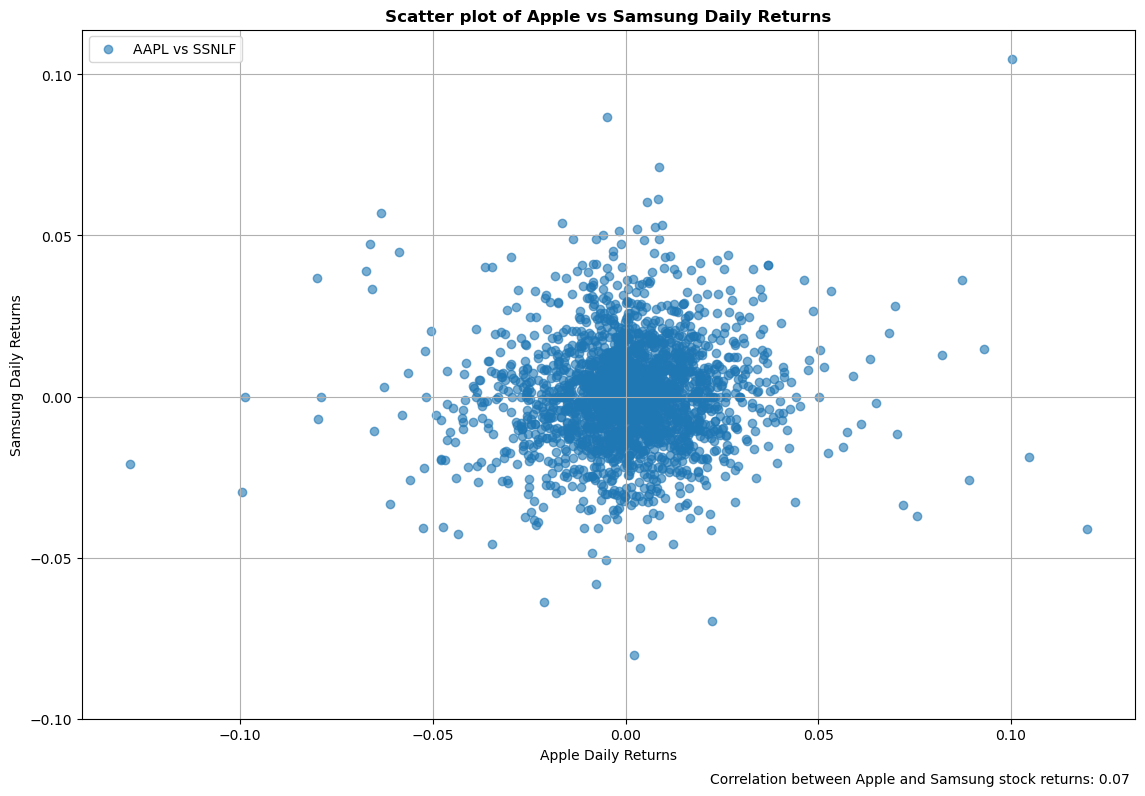

In [27]:
fontdict = {'fontsize': 12, 'weight': 'bold'}

# 종가 데이터 추출
apple_close = apple['Close'] * 1350
samsung_close = samsung['Close']

# 일간 수익률 계산
apple_returns = apple_close.pct_change().dropna().rename('Returns_AAPL')
samsung_returns = samsung_close.pct_change().dropna().rename('Returns_SSNLF')

# 데이터 병합
merged_data = pd.merge(apple_returns, samsung_returns, left_index=True, right_index=True)

# 상관관계 계산
correlation = merged_data.corr().iloc[0, 1]


plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Returns_AAPL'], merged_data['Returns_SSNLF'], alpha=0.6)
plt.title('Scatter plot of Apple vs Samsung Daily Returns', fontdict=fontdict)
plt.xlabel('Apple Daily Returns')
plt.ylabel('Samsung Daily Returns')
plt.yticks([-0.1, -0.05, 0, 0.05, 0.1])
plt.legend(['AAPL vs SSNLF'])
plt.grid()

# 상관관계 텍스트 추가
plt.text(x=0.022, y=-0.12, s=f"Correlation between Apple and Samsung stock returns: {correlation:.2f}", fontsize=10)


# 레이아웃 조정
plt.tight_layout()
# plt.show()
plt.savefig('apple_vs_samsung_correlation_scatter_plot.png')


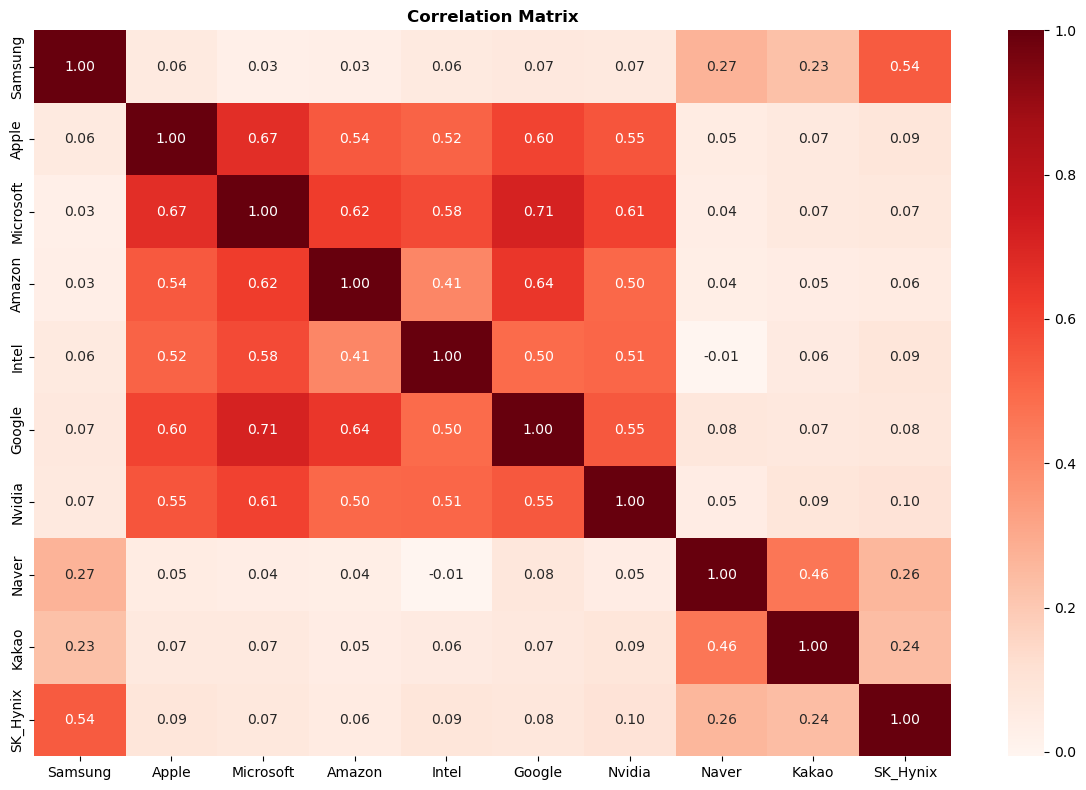

In [13]:
# 주식 티커 목록
tickers = {
    'Samsung': '005930.KS',
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Intel' : 'INTC',
    'Google': 'GOOGL',
    'Nvidia': 'NVDA',
    'Naver': '035420.KS',
    'Kakao': '035720.KS',
    'SK_Hynix': '000660.KS'
}

# 데이터 다운로드 기간 설정 (10년)
start_date = '2014-01-01'
end_date = '2024-01-01'

# 데이터 다운로드 및 전처리
data = {}
for name, ticker in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    data[name] = df['Close']

# 데이터프레임 생성
prices = pd.DataFrame(data)

# 일간 수익률 계산
returns = prices.pct_change().dropna()

# 상관관계 계산
correlation_matrix = returns.corr()

# 삼성전자와 다른 주식 간의 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Reds')
plt.xticks(rotation=0)
plt.title('Correlation Matrix', fontdict=fontdict)

plt.tight_layout()
# plt.show()
plt.savefig('correlation_matrix.png')

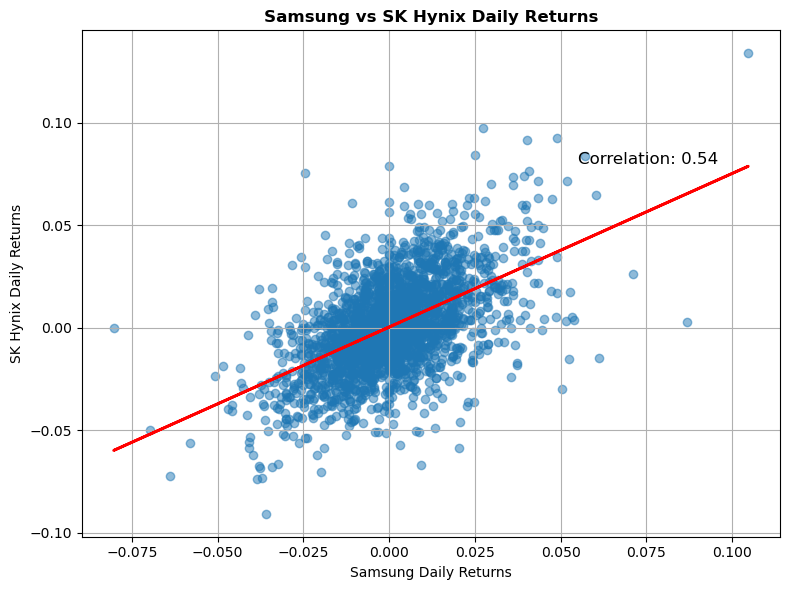

In [26]:
samsung_returns = returns['Samsung']
skhynix_returns = returns['SK_Hynix']

correlation = correlation_matrix.loc['Samsung', 'SK_Hynix']

X = samsung_returns.values.reshape(-1, 1)
y = skhynix_returns.values

model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(samsung_returns, skhynix_returns, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.text(x=0.055, y=0.08, s=f"Correlation: {correlation:.2f}", fontsize=12)
plt.title('Samsung vs SK Hynix Daily Returns', fontdict=fontdict)
plt.xlabel('Samsung Daily Returns')
plt.ylabel('SK Hynix Daily Returns')
plt.grid()
plt.tight_layout()
# plt.show()
plt.savefig('samsung_vs_skhynix_correlation_scatter_plot.png')